<a href="https://colab.research.google.com/github/Rajaanthonysamy/Interview_Preparation/blob/main/linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 500

# Features
size_sqft = np.random.normal(1500, 300, n).astype(int)              # House size in sqft
bedrooms = np.random.randint(1, 6, n)                                # Number of bedrooms
age_years = np.random.randint(0, 30, n)                              # Age of house
distance_to_city_km = np.random.normal(10, 5, n).clip(0, 30)         # Distance to city center in km

# True relationship (our underlying model for price)
# Assume base price is 50k, size contributes the most, then bedrooms, and so on
price = (
    50000 +
    (size_sqft * 100) +                   # $100 per sqft
    (bedrooms * 10000) -                  # each bedroom adds value
    (age_years * 500) -                   # older homes reduce value
    (distance_to_city_km * 1000) +        # further from city = cheaper
    (np.random.normal(0, 10000, n))       # noise
)

# Construct DataFrame
df = pd.DataFrame({
    'Size_sqft': size_sqft,
    'Bedrooms': bedrooms,
    'Age_years': age_years,
    'Distance_to_city_km': distance_to_city_km.round(2),
    'Price': price.round(2)
})

# Show sample
print(df.head())


   Size_sqft  Bedrooms  Age_years  Distance_to_city_km      Price
0       1649         2          9                12.53  228546.04
1       1458         2         29                 0.01  209770.35
2       1694         3         24                 5.78  232432.50
3       1956         3          6                 9.93  275733.32
4       1429         5         19                 3.15  221203.34


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.shape

(500, 5)

In [5]:
df.isnull().sum()

,0
Size_sqft,0
Bedrooms,0
Age_years,0
Distance_to_city_km,0
Price,0


In [9]:
import seaborn as sns

from matplotlib import pyplot as plt

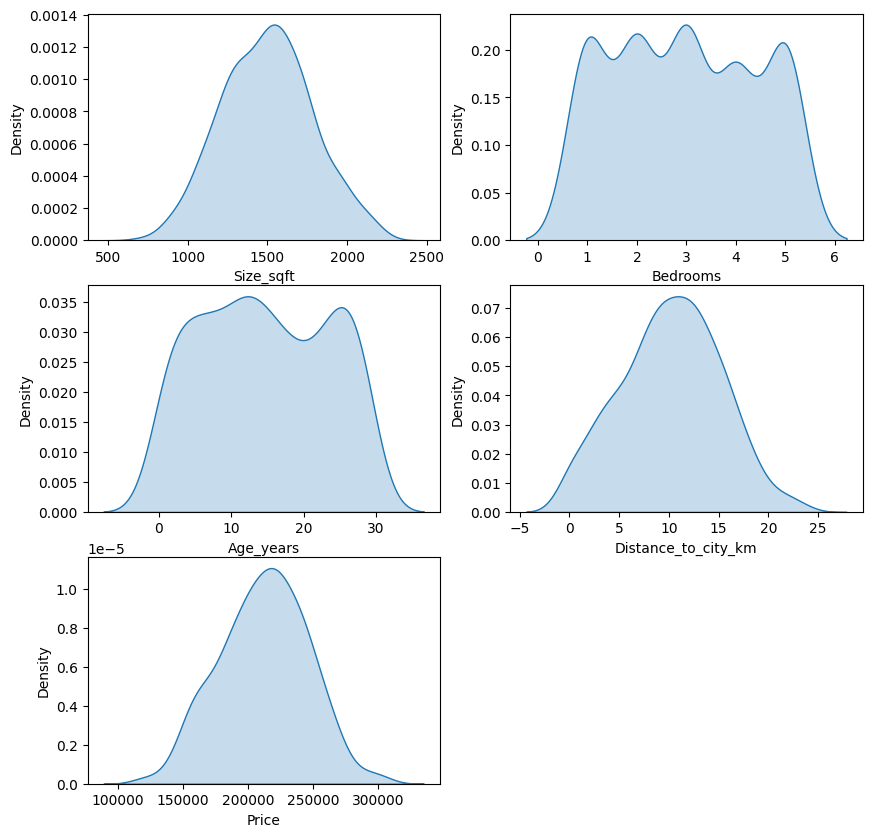

In [37]:
plt.figure(figsize=(10,10))
for col in df.columns:
  plt.subplot(3,2,df.columns.get_loc(col)+1)
  sns.kdeplot(df[col],fill=True)


<Axes: >

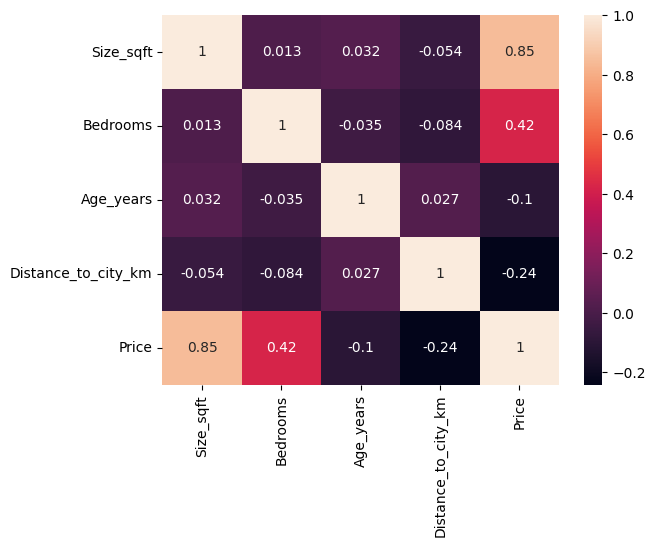

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.describe()

,Size_sqft,Bedrooms,Age_years,Distance_to_city_km,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1501.558000,2.966000,14.682000,10.221960,212240.907340
std,294.363255,1.422988,8.752261,5.043228,35263.529456
min,527.000000,1.000000,0.000000,0.000000,114722.450000
25%,1289.750000,2.000000,7.000000,6.855000,188325.837500
50%,1503.000000,3.000000,14.000000,10.255000,213443.665000
75%,1690.750000,4.000000,23.000000,13.690000,236468.990000
max,2655.000000,5.000000,29.000000,25.520000,344489.130000


<Axes: ylabel='Price'>

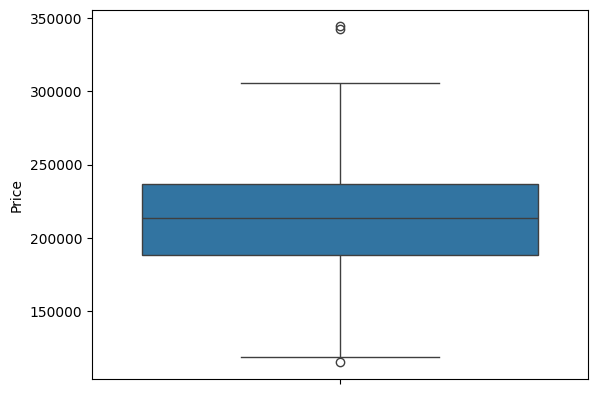

In [12]:
sns.boxplot(df['Price'])

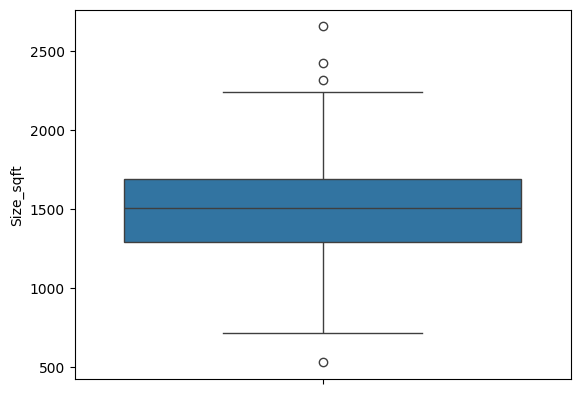

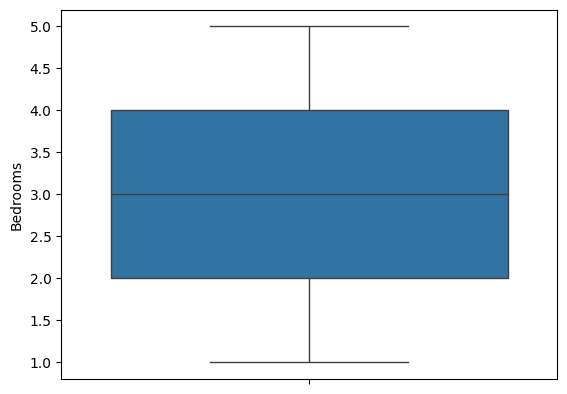

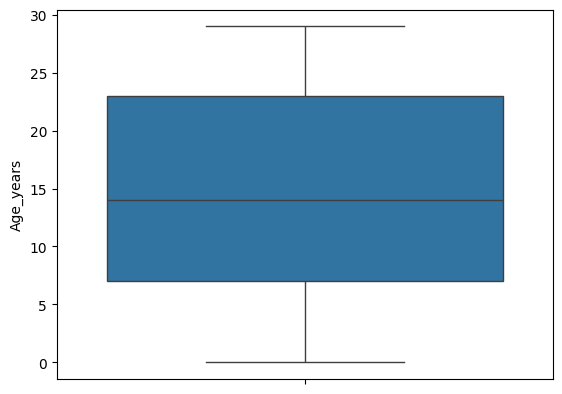

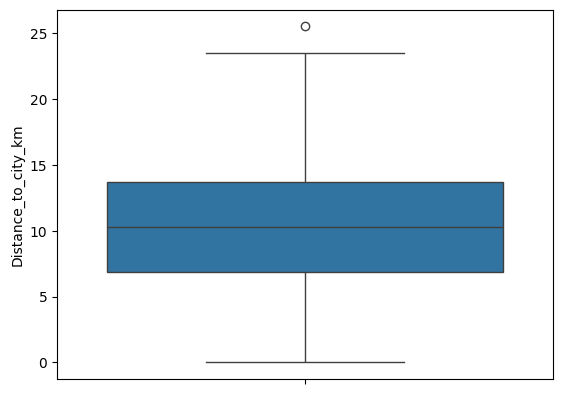

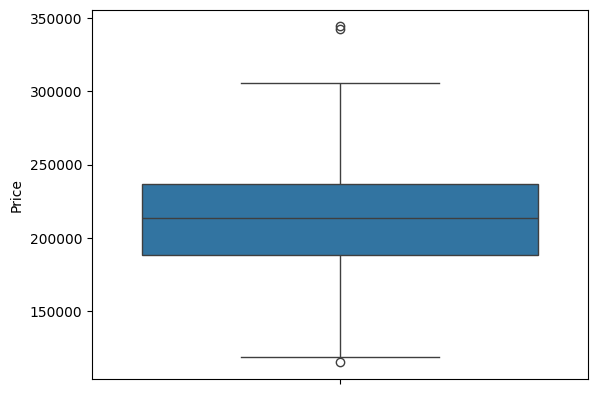

In [13]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [14]:
iqr_val={}
for col in df.columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  iqr_val[col]=[Q1,Q3,IQR,lower_bound,upper_bound]



In [15]:
iqr_val

{'Size_sqft': [np.float64(1289.75),
  np.float64(1690.75),
  np.float64(401.0),
  np.float64(688.25),
  np.float64(2292.25)],
 'Bedrooms': [np.float64(2.0),
  np.float64(4.0),
  np.float64(2.0),
  np.float64(-1.0),
  np.float64(7.0)],
 'Age_years': [np.float64(7.0),
  np.float64(23.0),
  np.float64(16.0),
  np.float64(-17.0),
  np.float64(47.0)],
 'Distance_to_city_km': [np.float64(6.855),
  np.float64(13.69),
  np.float64(6.834999999999999),
  np.float64(-3.3974999999999973),
  np.float64(23.942499999999995)],
 'Price': [np.float64(188325.8375),
  np.float64(236468.99),
  np.float64(48143.1525),
  np.float64(116111.10875),
  np.float64(308683.71875)]}

In [17]:
for key , val in iqr_val.items():
  outlier_index= df[(df[key]< val[3]) | (df[key]>val[4])].index
  df=df.drop(index=outlier_index)

In [18]:
df.shape

(495, 5)

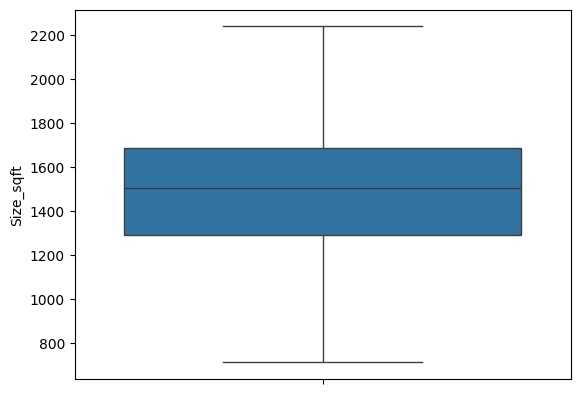

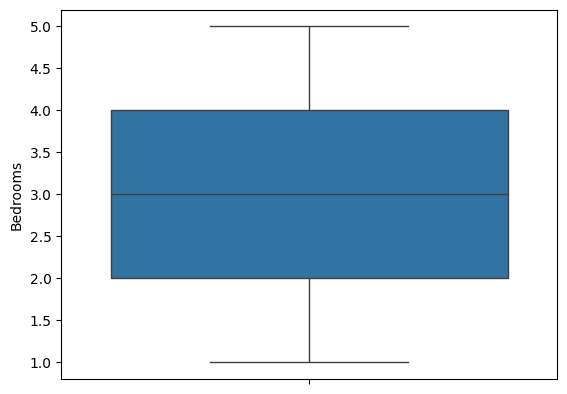

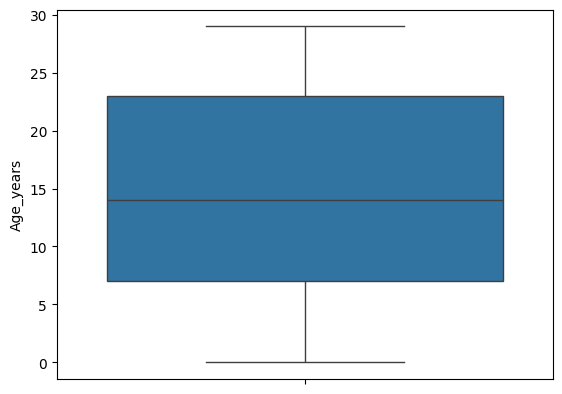

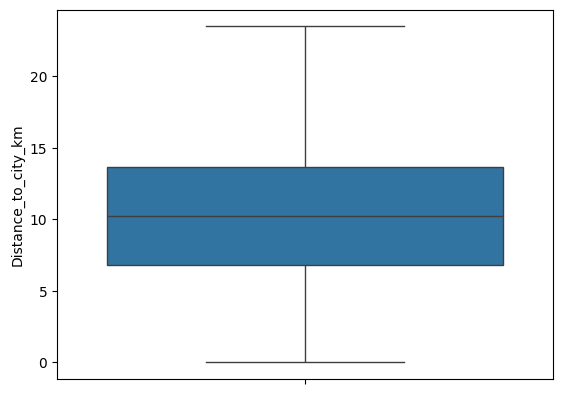

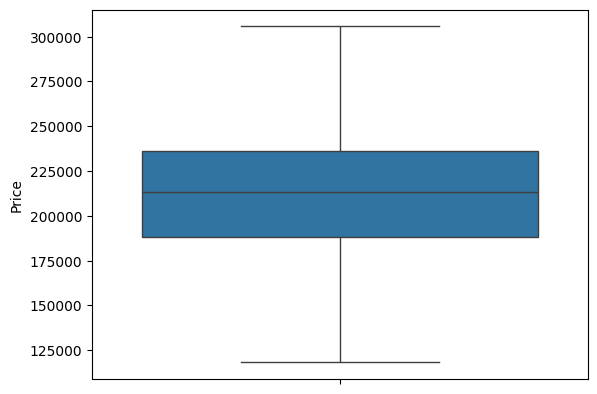

In [19]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
lnr_model=LinearRegression()

X=df.drop('Price',axis=1)
y=df['Price']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [25]:
lnr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
lnr_model.coef_

array([  101.52209881,  9689.60149738,  -469.04685343, -1048.68563982])

In [28]:
lnr_model.score(x_test,y_test)

0.9232609071140098

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(x_test)

array([[-0.67782899,  1.41295509,  1.43495909, -1.07014385],
       [-0.27797056,  0.71702198,  0.6328404 ,  0.92264583],
       [ 0.03543199,  1.41295509, -0.05468991,  0.74542145],
       ...,
       [ 0.9828443 , -0.67484422,  1.20578232,  0.3515895 ],
       [-0.00419362, -0.67484422, -0.62763183,  0.21177915],
       [-0.81111513, -1.37077732, -1.20057376, -0.3139865 ]])

In [30]:
lnr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
lnr_model.score(x_test_scaled,y_test)

0.92326090711401

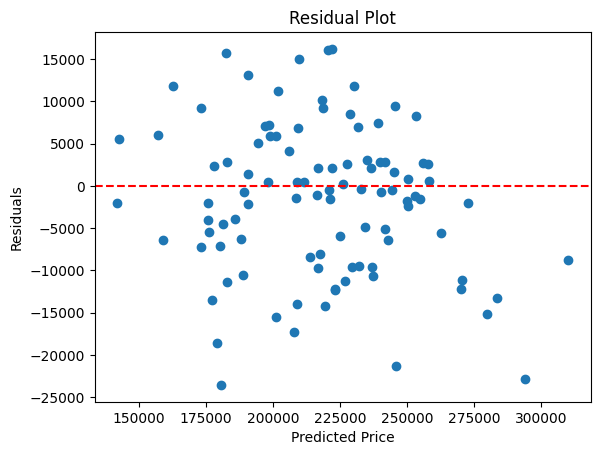

In [33]:
import matplotlib.pyplot as plt

y_pred = lnr_model.predict(x_test_scaled)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 9027.56
MAE: 7138.64
